# SynthCheck:A Synthetic Image Identification Using Deep Learning

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler 
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG19,EfficientNetB0,ResNet50
import numpy as np

In [2]:
# Load image dataset
data = tf.keras.utils.image_dataset_from_directory(r"D:\## BE Sem II\Project stage II\Cifake Dataset\TRAIN", image_size=(32, 32))

Found 11138 files belonging to 2 classes.


0.0
255.0


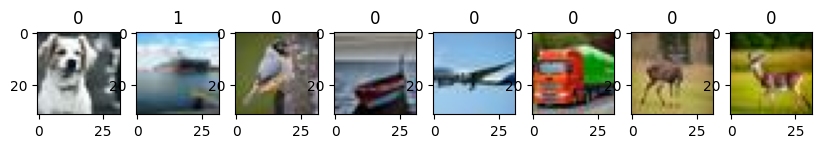

In [3]:
# Visualize a batch of images
data_it = data.as_numpy_iterator()
batch = data_it.next()

fig, ax = plt.subplots(ncols=8, figsize=(10, 10))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

print(batch[0].min())
print(batch[0].max())

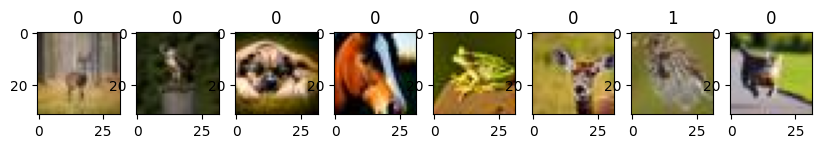

In [4]:
# Scale pixel values to the range [0, 1]
data = data.map(lambda x, y : (x/255, y))

# Visualize a scaled batch of images
scaled_it = data.as_numpy_iterator()
batch = scaled_it.next()

fig, ax = plt.subplots(ncols=8, figsize=(10, 10))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(float))
    ax[idx].title.set_text(batch[1][idx])


In [5]:
# Split the dataset
train_size = int(len(data) * 0.7)
cv_size = int(len(data) * 0.2)
test_size = int(len(data) * 0.1) + 1

train = data.take(train_size)
cv = data.skip(train_size).take(cv_size)
test = data.skip(train_size + cv_size).take(test_size)

print(len(train) + len(cv) + len(test))


348


In [6]:
# Define the CNN model with enhancements
model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
# Learning rate scheduler
initial_learning_rate = 0.001
def lr_scheduler(epoch, lr):
    return lr * 0.95  # Adjust the decay factor as needed
lr_schedule = LearningRateScheduler(lr_scheduler)
optimizer = Adam(learning_rate=initial_learning_rate)

In [8]:
# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# Train the model
history = model.fit(data, validation_data=cv, epochs=10, callbacks=[lr_schedule])


Epoch 1/10
349/349 [==============================] - 41s 117ms/step - loss: 0.1019 - accuracy: 0.9620 - val_loss: 0.3727 - val_accuracy: 0.8628 - lr: 5.6880e-04
Epoch 2/10
349/349 [==============================] - 39s 112ms/step - loss: 0.0824 - accuracy: 0.9684 - val_loss: 0.1219 - val_accuracy: 0.9529 - lr: 5.4036e-04
Epoch 3/10
349/349 [==============================] - 40s 114ms/step - loss: 0.0647 - accuracy: 0.9752 - val_loss: 0.4345 - val_accuracy: 0.8619 - lr: 5.1334e-04
Epoch 4/10
349/349 [==============================] - 41s 116ms/step - loss: 0.0541 - accuracy: 0.9815 - val_loss: 0.1045 - val_accuracy: 0.9642 - lr: 4.8767e-04
Epoch 5/10
349/349 [==============================] - 48s 136ms/step - loss: 0.0511 - accuracy: 0.9804 - val_loss: 0.1719 - val_accuracy: 0.9280 - lr: 4.6329e-04
Epoch 6/10
349/349 [==============================] - 46s 132ms/step - loss: 0.0397 - accuracy: 0.9852 - val_loss: 0.0319 - val_accuracy: 0.9882 - lr: 4.4013e-04
Epoch 7/10
349/349 [========

In [12]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

35/35 [==============================] - 3s 28ms/step - loss: 0.0082 - accuracy: 0.9982
Test Accuracy: 99.82%


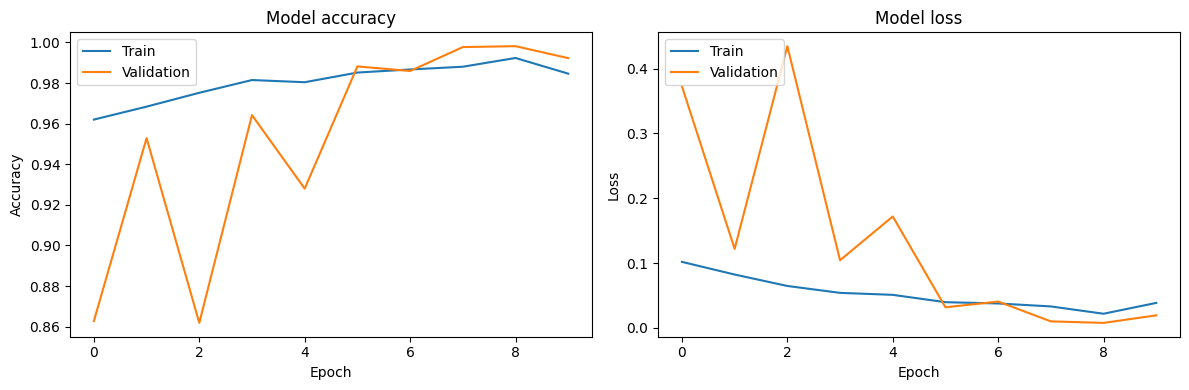

In [13]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()



In [14]:
from tensorflow.keras.metrics import Precision, Recall

pre = Precision()
rec = Recall()


for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    

1/1 [==============================] - 0s 42ms/step


In [15]:
print(f'Precision: {pre.result().numpy()}, Recall: {rec.result().numpy()}')

Precision: 0.9956896305084229, Recall: 1.0


In [16]:
from tensorflow.keras.models import load_model
from keras.models import load_model
from tensorflow import keras



In [17]:
model.save("AIGeneratedModel.h5")

In [18]:
model_new = keras.models.load_model("AIGeneratedModel.h5")

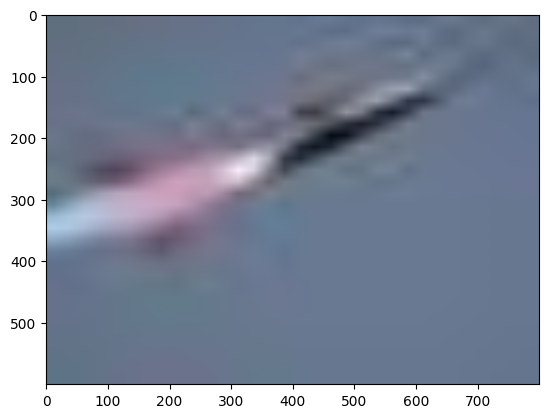

In [24]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = r"D:\## BE Sem II\Project stage II\Cifake Dataset\TEST\FAKE\94.jpg"
try:
    img = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if img is None:
        raise FileNotFoundError(f"Could not read the image from {image_path}")

    # Resize the image to a larger size
    img = cv2.resize(img, (800, 600))

    # Convert from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the resized image
    plt.imshow(img)
    plt.show()

except Exception as e:
    print(f"Error: {e}")


In [25]:
import numpy as np

In [26]:
resize = tf.image.resize(img, (32, 32))

y_pred = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 27ms/step


In [27]:
y_pred

array([[0.00306051]], dtype=float32)

In [28]:
if y_pred > 0.5: 
    print(f'Predicted class: REAL')
else:
    print(f'Predicted class: SYNTHETIC')

Predicted class: SYNTHETIC


In [29]:
# Define a VGG19 model for image classification
vgg_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
vgg_model.trainable = False  

In [30]:
# Create a new model by adding a few layers on top of the VGG19 model
vgg_based_model = models.Sequential()
vgg_based_model.add(vgg_model)
vgg_based_model.add(layers.Flatten())
vgg_based_model.add(layers.Dense(256, activation='relu'))
vgg_based_model.add(layers.BatchNormalization())
vgg_based_model.add(layers.Dropout(0.5))
vgg_based_model.add(layers.Dense(128, activation='relu'))
vgg_based_model.add(layers.Dense(1, activation='sigmoid'))

In [31]:
# Learning rate scheduler for the VGG19-based model
vgg_initial_learning_rate = 0.001
vgg_lr_schedule = LearningRateScheduler(lambda epoch, lr: lr * 0.95)
vgg_optimizer = Adam(learning_rate=vgg_initial_learning_rate)


In [32]:
# Compile the VGG19-based model
vgg_based_model.compile(optimizer=vgg_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
# Train the VGG19-based model
vgg_history = vgg_based_model.fit(data, validation_data=cv, epochs=10, callbacks=[vgg_lr_schedule])


Epoch 1/10
349/349 [==============================] - 70s 198ms/step - loss: 0.4907 - accuracy: 0.7699 - val_loss: 0.4044 - val_accuracy: 0.8075 - lr: 9.5000e-04
Epoch 2/10
349/349 [==============================] - 68s 195ms/step - loss: 0.4134 - accuracy: 0.8087 - val_loss: 0.3220 - val_accuracy: 0.8619 - lr: 9.0250e-04
Epoch 3/10
349/349 [==============================] - 72s 205ms/step - loss: 0.3916 - accuracy: 0.8262 - val_loss: 0.3156 - val_accuracy: 0.8623 - lr: 8.5737e-04
Epoch 4/10
349/349 [==============================] - 70s 201ms/step - loss: 0.3749 - accuracy: 0.8315 - val_loss: 0.2945 - val_accuracy: 0.8804 - lr: 8.1451e-04
Epoch 5/10
349/349 [==============================] - 69s 197ms/step - loss: 0.3599 - accuracy: 0.8419 - val_loss: 0.2855 - val_accuracy: 0.8786 - lr: 7.7378e-04
Epoch 6/10
349/349 [==============================] - 67s 193ms/step - loss: 0.3525 - accuracy: 0.8443 - val_loss: 0.2771 - val_accuracy: 0.8854 - lr: 7.3509e-04
Epoch 7/10
349/349 [========

In [34]:
# Evaluate the VGG19-based model on the test set
vgg_test_loss, vgg_test_accuracy = vgg_based_model.evaluate(test)
print(f'VGG19 Test Accuracy: {vgg_test_accuracy * 100:.2f}%')


35/35 [==============================] - 8s 156ms/step - loss: 0.2391 - accuracy: 0.9071
VGG19 Test Accuracy: 90.71%


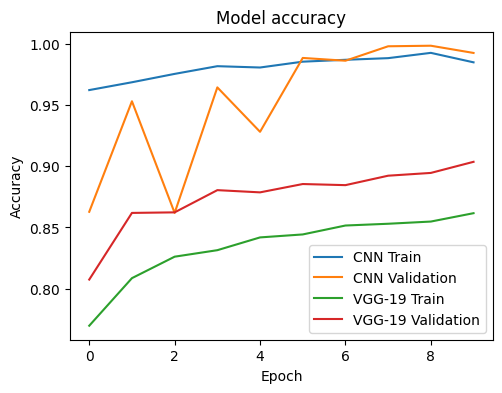

In [36]:
# Compare performance between the CNN model and the VGG-19 based model
plt.figure(figsize=(12, 4))
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='CNN Train')
plt.plot(history.history['val_accuracy'], label='CNN Validation')
plt.plot(vgg_history.history['accuracy'], label='VGG-19 Train')
plt.plot(vgg_history.history['val_accuracy'], label='VGG-19 Validation')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

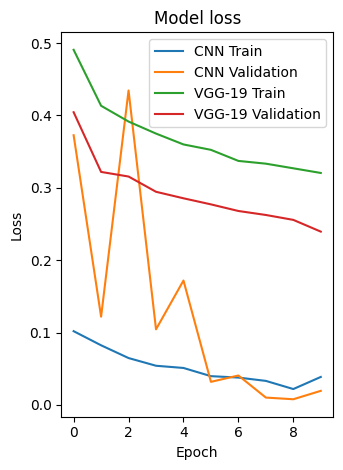

In [37]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='CNN Train')
plt.plot(history.history['val_loss'], label='CNN Validation')
plt.plot(vgg_history.history['loss'], label='VGG-19 Train')
plt.plot(vgg_history.history['val_loss'], label='VGG-19 Validation')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [38]:
from tensorflow.keras.metrics import Precision, Recall

pre = Precision()
rec = Recall()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = vgg_based_model.predict(X)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)

1/1 [==============================] - 0s 194ms/step


In [39]:
print(f'Precision: {pre.result().numpy()}, Recall: {rec.result().numpy()}')


Precision: 0.8904109597206116, Recall: 0.8764045238494873


In [40]:
vgg_based_model.save("AIGeneratedModel.h5")

In [41]:
vgg_based_model_new = keras.models.load_model("AIGeneratedModel.h5")

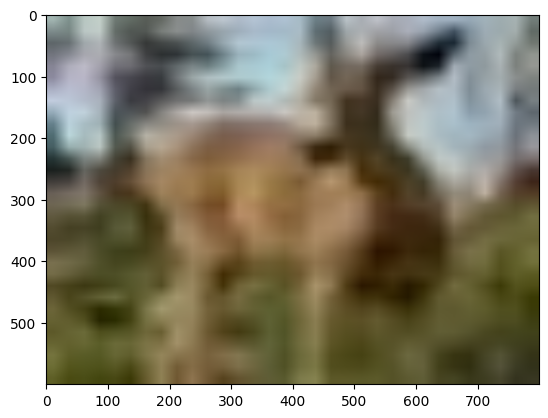

In [42]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = r"D:\## BE Sem II\Project stage II\Cifake Dataset\TEST\REAL\0500 (5).jpg"

try:
    img = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if img is None:
        raise FileNotFoundError(f"Could not read the image from {image_path}")

    # Resize the image to a larger size
    img = cv2.resize(img, (800, 600))

    # Convert from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the resized image
    plt.imshow(img)
    plt.show()

except Exception as e:
    print(f"Error: {e}")


In [43]:
import numpy as np

In [44]:
resize = tf.image.resize(img, (32, 32))

y_pred = vgg_based_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 190ms/step


In [45]:
y_pred

array([[0.99724585]], dtype=float32)

In [46]:
if y_pred > 0.5: 
    print(f'Predicted class: REAL')
else:
    print(f'Predicted class: SYNTHETIC')

Predicted class: REAL


In [53]:
# Define a ResNet model for image classification
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
resnet_model.trainable = False  # Freeze the weights of the pre-trained model

In [54]:
# Create a new model by adding a few layers on top of the ResNet model
resnet_based_model = models.Sequential()
resnet_based_model.add(resnet_model)
resnet_based_model.add(layers.Flatten())
resnet_based_model.add(layers.Dense(256, activation='relu'))
resnet_based_model.add(layers.BatchNormalization())
resnet_based_model.add(layers.Dropout(0.5))
resnet_based_model.add(layers.Dense(128, activation='relu'))
resnet_based_model.add(layers.Dense(1, activation='sigmoid'))

In [55]:
# Learning rate scheduler for the ResNet-based model
resnet_initial_learning_rate = 0.001
resnet_lr_schedule = LearningRateScheduler(lambda epoch, lr: lr * 0.95)
resnet_optimizer = Adam(learning_rate=resnet_initial_learning_rate)

In [56]:
# Compile the ResNet-based model
resnet_based_model.compile(optimizer=resnet_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
# Train the ResNet-based model
resnet_history = resnet_based_model.fit(data, validation_data=cv, epochs=10, callbacks=[resnet_lr_schedule])


Epoch 1/10
349/349 [==============================] - 54s 142ms/step - loss: 0.6020 - accuracy: 0.6861 - val_loss: 0.7735 - val_accuracy: 0.5634 - lr: 9.5000e-04
Epoch 2/10
349/349 [==============================] - 50s 144ms/step - loss: 0.5676 - accuracy: 0.7119 - val_loss: 1.9766 - val_accuracy: 0.4307 - lr: 9.0250e-04
Epoch 3/10
349/349 [==============================] - 51s 144ms/step - loss: 0.5496 - accuracy: 0.7268 - val_loss: 0.5405 - val_accuracy: 0.7405 - lr: 8.5737e-04
Epoch 4/10
349/349 [==============================] - 48s 136ms/step - loss: 0.5350 - accuracy: 0.7369 - val_loss: 0.6367 - val_accuracy: 0.6544 - lr: 8.1451e-04
Epoch 5/10
349/349 [==============================] - 48s 138ms/step - loss: 0.5267 - accuracy: 0.7395 - val_loss: 0.6356 - val_accuracy: 0.6535 - lr: 7.7378e-04
Epoch 6/10
349/349 [==============================] - 51s 145ms/step - loss: 0.5233 - accuracy: 0.7493 - val_loss: 1.3104 - val_accuracy: 0.5874 - lr: 7.3509e-04
Epoch 7/10
349/349 [========

In [58]:
# Evaluate the ResNet-based model on the test set
resnet_test_loss, resnet_test_accuracy = resnet_based_model.evaluate(test)
print(f'ResNet Test Accuracy: {resnet_test_accuracy * 100:.2f}%')

35/35 [==============================] - 5s 82ms/step - loss: 0.5567 - accuracy: 0.7152
ResNet Test Accuracy: 71.52%


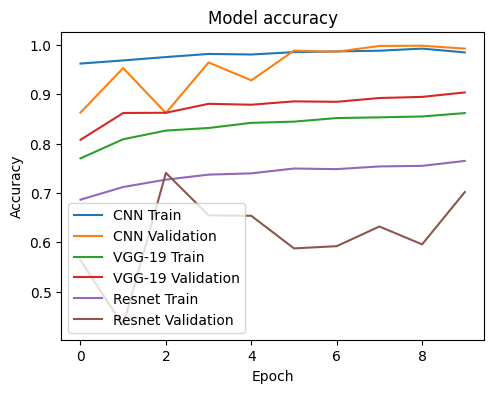

In [59]:
# Compare performance between the CNN model,VGG_19 model and the ResNet-based model
plt.figure(figsize=(12, 4))
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='CNN Train')
plt.plot(history.history['val_accuracy'], label='CNN Validation')
plt.plot(vgg_history.history['accuracy'], label='VGG-19 Train')
plt.plot(vgg_history.history['val_accuracy'], label='VGG-19 Validation')
plt.plot(resnet_history.history['accuracy'], label='Resnet Train')
plt.plot(resnet_history.history['val_accuracy'], label='Resnet Validation')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

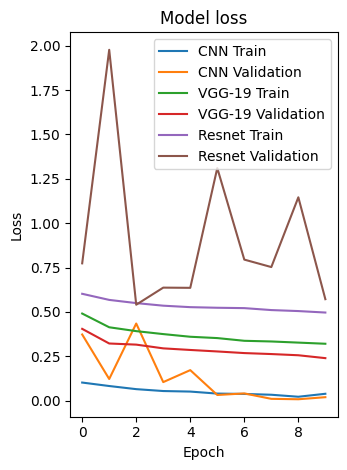

In [60]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='CNN Train')
plt.plot(history.history['val_loss'], label='CNN Validation')
plt.plot(vgg_history.history['loss'], label='VGG-19 Train')
plt.plot(vgg_history.history['val_loss'], label='VGG-19 Validation')
plt.plot(resnet_history.history['loss'], label='Resnet Train')
plt.plot(resnet_history.history['val_loss'], label='Resnet Validation')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [61]:
from tensorflow.keras.metrics import Precision, Recall

pre = Precision()
rec = Recall()


for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)

1/1 [==============================] - 0s 64ms/step


In [62]:
print(f'Precision: {pre.result().numpy()}, Recall: {rec.result().numpy()}')

Precision: 0.993534505367279, Recall: 1.0


In [63]:
resnet_based_model.save("AIGeneratedModel.h5")

In [64]:
resnet_based_model_new = keras.models.load_model("AIGeneratedModel.h5")

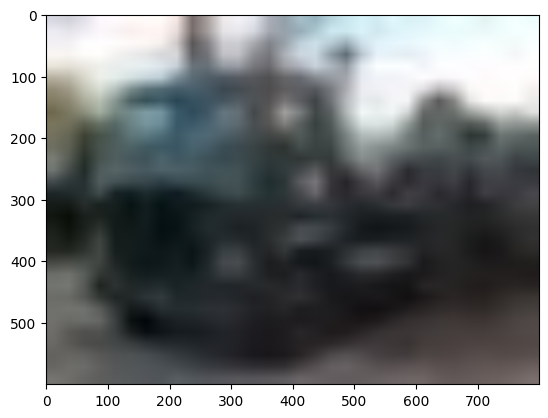

In [70]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = r"D:\## BE Sem II\Project stage II\Cifake Dataset\TEST\REAL\0462 (10).jpg"

try:
    img = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if img is None:
        raise FileNotFoundError(f"Could not read the image from {image_path}")

    # Resize the image to a larger size
    img = cv2.resize(img, (800, 600))

    # Convert from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the resized image
    plt.imshow(img)
    plt.show()

except Exception as e:
    print(f"Error: {e}")

In [71]:
import numpy as np

In [72]:
resize = tf.image.resize(img, (32, 32))

y_pred = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 64ms/step


In [73]:
y_pred

array([[0.9999967]], dtype=float32)

In [74]:
if y_pred > 0.5: 
    print(f'Predicted class: REAL')
else:
    print(f'Predicted class: SYNTHETIC')

Predicted class: REAL
